COMP0051 Couesework 1

Shijun Luo 22183515

Questions:

Time series [10 Points]

1. Download a price time series using an API. The length of the time series T , with T = 300.
The resolution could be any, from tick data to months.

2. Plot the price time series

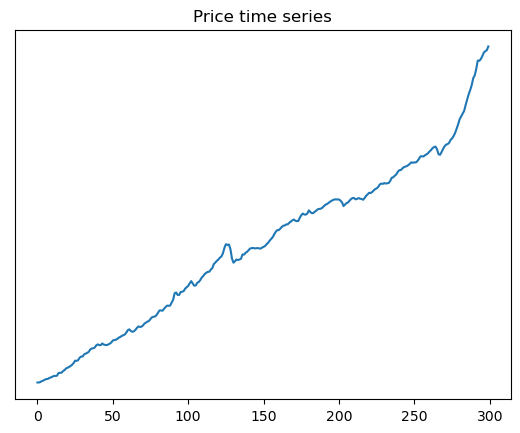

In [37]:
#https://fred.stlouisfed.org/series/mydata

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from full_fred.fred import Fred
import os

os.environ['FRED_API_KEY'] = '7ac64de6758107fdfc607faf255f793d'

fred = Fred()
fred.env_api_key_found()

mydata = fred.get_series_df('CPIAUCSL')
mydata = mydata[mydata['value'] != '.']
mydata = mydata.tail(300)
date_index = mydata['date']
mydata = mydata['value'].astype(float).tolist()

plt.yticks(np.arange(0, 10, step=10)) 
plt.plot(mydata[-300:])
plt.title('Price time series')
plt.show()


Questions:

Moving averages [20 Points]

3. Define mathematically the moving average of the price time series with an arbitrary time-
window τ

4. Compute three moving averages of the price time series, with time-windows τ = 10, 20, 30

5. Plot the moving averages against the price time series

6. Compute the linear and log-return of the price time series

7. Plot the linear return against the log-return time series

In [38]:
def moving_average(time_series, moving_tau):
    #ma is the moving average answer and will further return
    ma = []
    for i in range(len(time_series) - moving_tau):
        temp = sum(time_series[i: i + moving_tau]) / moving_tau
        ma.append(temp)
    return ma

mydata_ma10 = moving_average(mydata, 10)
mydata_ma20 = moving_average(mydata, 20)
mydata_ma30 = moving_average(mydata, 30)

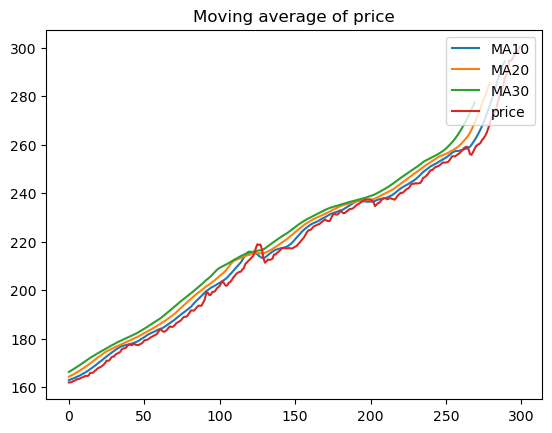

In [39]:
plt.plot(mydata_ma10, label = 'MA10')
plt.plot(mydata_ma20, label = 'MA20')
plt.plot(mydata_ma30, label = 'MA30')
plt.plot(mydata, label = 'price')
plt.title('Moving average of price')
plt.legend(loc = "upper right")
plt.show()

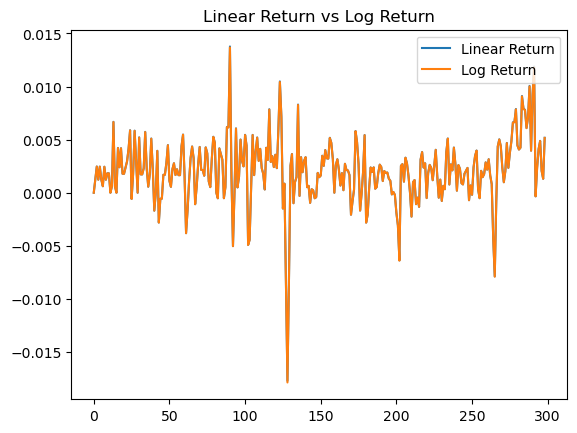

In [40]:
linear_return = []
log_return = []
for i in range(len(mydata) - 1):
    linear_temp = mydata[i + 1] / mydata[i] - 1
    linear_return.append(linear_temp)
    log_temp = np.log(mydata[i + 1]) - np.log(mydata[i])
    log_return.append(log_temp)

plt.plot(linear_return, label = 'Linear Return')
plt.plot(log_return, label = 'Log Return')
plt.title('Linear Return vs Log Return')
plt.legend(loc = "upper right")
plt.show()

Questions:

Time Series Analysis [20 Points]

8. Define the auto-correlation function (for a stationary time-series)

9. Compute the auto-correlation function (ACF) of the price time series

10. Plot the price ACF

11. Compute the partial auto-correlation function (PACF) of the price time series

12. Plot the price PACF

13. Compute the auto-correlation function (ACF) of the return time series

14. Plot the return ACF

15. Compute the partial auto-correlation function (PACF) of the return time series

16. Plot the return PACF

for a weak stationarity price time series $\{r_t\}$, we denote $\{\hat{\rho}_l\}$ as the ACF with lag $=l$ of it:

\begin{equation*}
\rho_l=\frac{\operatorname{Cov}\left(r_t, r_{t-l}\right)}{\sqrt{\operatorname{Var}\left(r_t\right) \operatorname{Var}\left(r_{t-l}\right)}}=\frac{\operatorname{Cov}\left(r_t, r_{t-l}\right)}{\operatorname{Var}\left(r_t\right)}=\frac{\gamma_l}{\gamma_0}
\end{equation*}

We used $\operatorname{Var}\left(r_t\right)=\operatorname{Var}\left(r_{t-l}\right)$ because of its weak stationarity.

Also, we can calculate it by

\begin{equation*}
\hat{\rho}_l=\frac{\sum_{t=l+1}^T\left(r_t-\bar{r}\right)\left(r_{t-l}-\bar{r}\right)}{\sum_{t=1}^T\left(r_t-\bar{r}\right)^2}, \quad 0 \leqslant l<T-1.
\end{equation*}


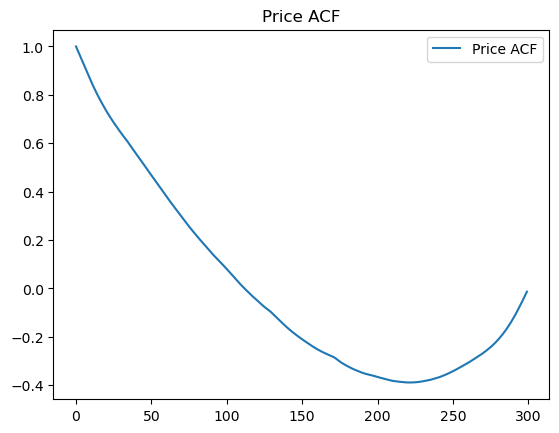

In [41]:
def acf(time_series, time_lag):
    if time_lag < 0:
        return 0
    length = len(time_series)
    avg = np.average(time_series)
    ans = np.dot(np.array(time_series[time_lag: ]) - avg, np.array(time_series[: length - time_lag]) - avg) / np.dot(np.array(time_series[: ]) - avg, np.array(time_series[: ] - avg))
    return ans

price_acf = []
for i in range(len(mydata)):
    price_acf.append(acf(mydata, i))
#print(price_acf)

plt.plot(price_acf, label = 'Price ACF')
plt.title('Price ACF')
plt.legend(loc = "upper right")
plt.show()

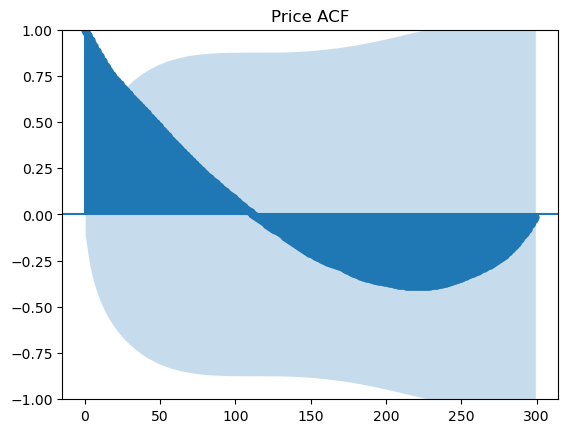

In [42]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf
tsaplots.plot_acf(mydata, lags = len(mydata) - 1)
plt.title('Price ACF')
plt.show()

In [43]:
def pacf(time_series):
    length = len(time_series)
    phi = np.zeros((length + 1, length + 1))
    for n in range(1, length + 1):
        phi[n][n] = (acf(time_series, n) - np.dot(np.array(phi[n - 1][1:]), np.array([acf(time_series, i) for i in range(n - 1, n - 1 - length, -1)]))) / (1 - np.dot(np.array(phi[n - 1][1:]), np.array([acf(time_series, i) for i in range(1, length + 1)])))
        for k in range(1, n):
            phi[n][k] = phi[n - 1][k] - phi[n][n] * phi[n - 1][n - k]
            #print(n, k, phi[n][k])
    #print(phi != 0)
    return [phi[i][i] for i in range(1, length + 1)]
price_pacf = pacf(mydata)

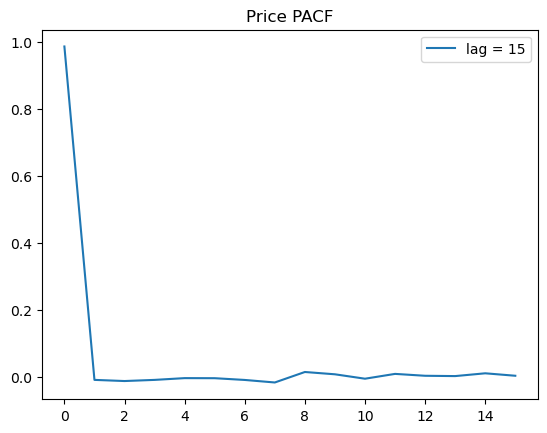

In [44]:
price_pacf_15 = price_pacf[:16]
plt.plot(price_pacf_15, label = 'lag = 15')
plt.title('Price PACF')
plt.legend(loc = "upper right")
plt.show()

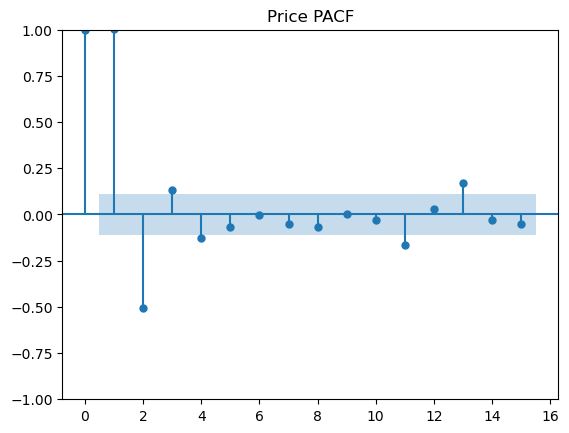

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(mydata, lags = 15, method = "ols")
plt.title('Price PACF')
plt.show()

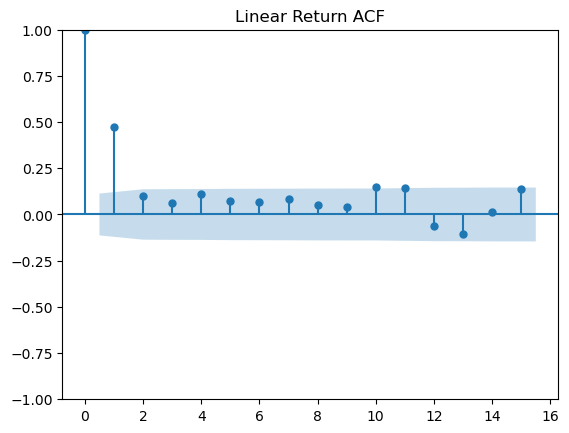

In [46]:
tsaplots.plot_acf(linear_return, lags = 15)
plt.title('Linear Return ACF')
plt.show()

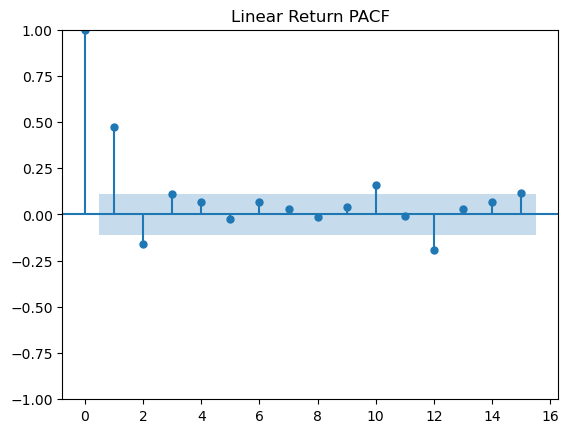

In [47]:
plot_pacf(linear_return, lags = 15, method = "ols")
plt.title('Linear Return PACF')
plt.show()

Questions:

ARMA models [30 Points]

17. Define mathematically an ARMA(p,q) model

18. Define a training and test set and fit an ARMA model to the price time series

19. Display the parameters of the model and its Mean Squared Error (MSE) in the training
set and in the test set

20. Plot the price time series vs the ARMA forecast in the test set

21. Fit an ARMA model to the return time series

22. Display the parameters of the model and its Mean Squared Error (MSE) in the training
set and in the test set

23. Plot the return time series vs the ARMA forecast in the test set

ARMA is Autoregressive moving average model. $ARMA(p, q)$ model refers to the model with $p$ autoregressive terms and $q$ moving-average terms. This model contains the $AR(p)$ and $MA(q)$ models,

\begin{equation*}
  X_t = \sum_{j=1}^p a_j X_{t-j} + \varepsilon_t +\sum_{j=1}^q b_j\varepsilon_{t-j}, 
  t=1,2,\dots
\end{equation*}

In which $\{X_t\}$ is the series itself, $\{\varepsilon_t\}$ series is white noise and usually i.i.d n.v.

The price time series is non-stationarity. p-value = 0.9987785559571943
The 1st difference of price time series is non-stationarity. p-value = 0.21751463821524308
The 2nd difference of price time series is stationarity. p-value = 1.8458743884996102e-11
The 2nd difference of price time series is not white noise. p-value = 0.010993419400210997


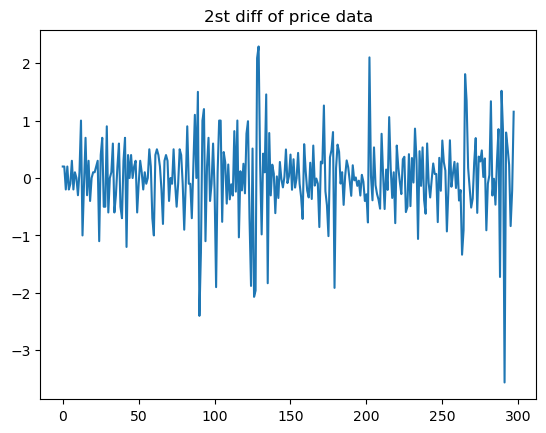

In [48]:
#stationarity test
import statsmodels
from statsmodels.tsa.stattools import adfuller
result = adfuller(mydata, autolag = 'aic') #adf test
if result[1] < 0.05:
    print("The price time series is stationarity. p-value = %s" %result[1])
else:
    print("The price time series is non-stationarity. p-value = %s" %result[1])

mydata_diff1 = [mydata[i + 1] - mydata[i] for i in range(len(mydata) - 1)]
result = adfuller(mydata_diff1, autolag = 'aic') #adf test again
if result[1] < 0.05:
    print("The 1st difference of price time series is stationarity. p-value = %s" %result[1])
else:
    print("The 1st difference of price time series is non-stationarity. p-value = %s" %result[1])

mydata_diff2 = [mydata_diff1[i + 1] - mydata_diff1[i] for i in range(len(mydata_diff1) - 1)]
result = adfuller(mydata_diff2, autolag = 'aic') #adf test again
if result[1] < 0.05:
    print("The 2nd difference of price time series is stationarity. p-value = %s" %result[1])
else:
    print("The 2nd difference of price time series is non-stationarity. p-value = %s" %result[1])

#white noise test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
p = lb_test(mydata_diff2, lags = 1).iloc[0].lb_pvalue
if p < 0.05:
    print("The 2nd difference of price time series is not white noise. p-value = %s" %p)
else:
    print("The 2nd difference of price time series is white noise. p-value = %s" %p)

plt.plot(mydata_diff2)
plt.title('2st diff of price data')
plt.show()

Then, we have to split the dataset and find the order of ARMA model by using AIC principle.

In [49]:
#split dataset
df_mydata = pd.DataFrame(mydata)
df_mydata.index = pd.date_range(start = '1998', end = '2023', freq = 'M')
train, test = df_mydata[: len(df_mydata) - 50], df_mydata[len(df_mydata) - 50:]

In [50]:
#calculate AIC
import statsmodels.api as sm
from statsmodels.tsa.api import ARIMA
aic_value = []
for ari in range(0, 5):
    for maj in range(0, 5):
        try:
            arma_obj = ARIMA(train, order = (ari, 2, maj)).fit()
            aic_value.append({'i' : ari,'j' : maj, 'aic_value' : arma_obj.aic})
        except Exception as e:
            print(e)
def sort_by_aic(e):
    return e['aic_value']
aic_value.sort(key = sort_by_aic)


c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\t

In [51]:
print(*aic_value, sep = "\n")

{'i': 0, 'j': 4, 'aic_value': 402.4749014130264}
{'i': 2, 'j': 1, 'aic_value': 402.7058694546404}
{'i': 1, 'j': 3, 'aic_value': 403.01958103894185}
{'i': 0, 'j': 3, 'aic_value': 403.67500751739806}
{'i': 2, 'j': 3, 'aic_value': 404.36244865113133}
{'i': 0, 'j': 2, 'aic_value': 404.42439107309434}
{'i': 1, 'j': 4, 'aic_value': 404.44064608601605}
{'i': 3, 'j': 1, 'aic_value': 404.5566738090891}
{'i': 2, 'j': 2, 'aic_value': 404.6003056598277}
{'i': 1, 'j': 2, 'aic_value': 404.6351649295897}
{'i': 2, 'j': 4, 'aic_value': 404.95957723143766}
{'i': 3, 'j': 3, 'aic_value': 405.2641270310902}
{'i': 4, 'j': 1, 'aic_value': 406.2675363706022}
{'i': 3, 'j': 2, 'aic_value': 406.5639934482614}
{'i': 4, 'j': 3, 'aic_value': 406.6779917588891}
{'i': 3, 'j': 4, 'aic_value': 406.7804514504528}
{'i': 4, 'j': 2, 'aic_value': 408.32700750905053}
{'i': 4, 'j': 4, 'aic_value': 409.14840467549857}
{'i': 1, 'j': 1, 'aic_value': 412.2602310243742}
{'i': 3, 'j': 0, 'aic_value': 446.0269926510831}
{'i': 4, 'j'

As we can see, AIC will have minimize value of $402.4749014130264$ when AR order $i = 0$ and MA order $j = 4$, so we develop ARMA(0, 4) for the 2nd difference of the price.

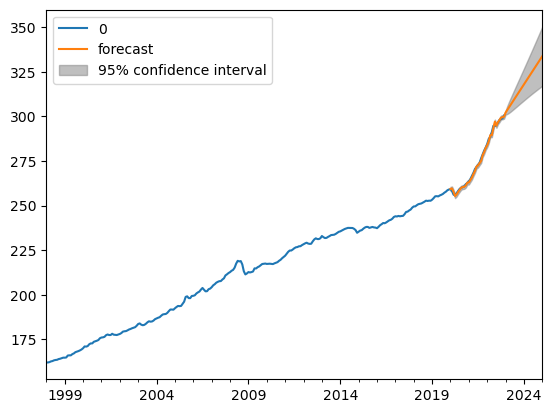

In [52]:
from statsmodels.graphics.tsaplots import plot_predict
res = ARIMA(df_mydata, order = (0, 2, 4)).fit()
fig, ax = plt.subplots()
ax = df_mydata.loc['1998':].plot(ax = ax)
plot_predict(res, start = '2020', end = '2025', ax = ax)
plt.show()

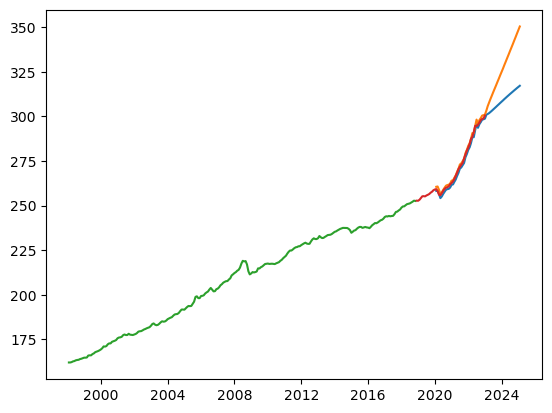

In [53]:
my_prediction = res.get_prediction(start = '2020', end = '2025').conf_int()
plt.plot(my_prediction)
plt.plot(train)
plt.plot(test)

In [54]:
print(res.summary())

coef = res.params
print('Coefficients: %s' %coef)

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  300
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -265.227
Date:                Mon, 20 Feb 2023   AIC                            540.454
Time:                        13:41:10   BIC                            558.939
Sample:                    01-31-1998   HQIC                           547.853
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4062      0.034    -11.853      0.000      -0.473      -0.339
ma.L2         -0.4290      0.046     -9.243      0.000      -0.520      -0.338
ma.L3         -0.1042      0.060     -1.730      0.0

From the summary above, we can have all of the value of coefficients and their associated p-values. Note that p-value of const is not statistically significant but we still leave it there. Now we have the model as:

\begin{align*}
    X_t = &-0.4062 \varepsilon_{t-1} -0.4290 \varepsilon_{t-2}\\ &-0.1042 \varepsilon_{t-3} + 0.0470 \varepsilon_{t-4}, \ t = 1, 2, \dots
\end{align*}
And the noise $\varepsilon_{t}$ has a varience of $0.3455$

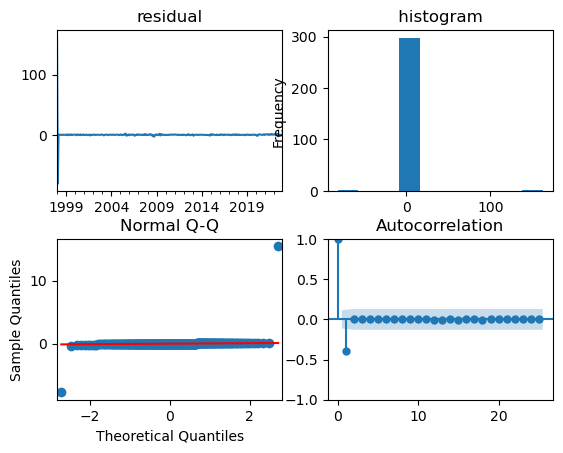

Test MSE: 4231.963


In [55]:
resid = res.resid
from statsmodels.graphics.api import qqplot

fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.3)

resid.plot(ax = axs[0][0])
axs[0][0].set_title("residual")

resid.plot(kind = 'hist', ax = axs[0][1])
axs[0][1].set_title(" histogram " )

sm.qqplot(resid, line = 'q', fit = True, ax = axs[1][0])
axs[1][0].set_title("Normal Q-Q")

plot_acf(resid,ax = axs[1][1])
plt.show()

from sklearn.metrics import mean_squared_error
predictions = res.forecast(steps = len(test))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

So test MSE is 4231.963.

Beneath is the residual analysis map.

In the top right plot, we see most of residual are near 0. This is a good indication that the residuals are distributed very good.

The q-q plot on the lower left shows that the distribution of the residuals (blue dots) follows a standard normal distribution. Also, shows that the residuals are normally distributed.

The residuals over time (top left panel) do not show any obvious seasonal variation, but are white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the lower right, which shows that the time series residuals are less correlated.

Now we head to process return time series. Just the same method.

The log return time series is stationarity. p-value = 0.0005375473684267725
The 2nd difference of price time series is not white noise. p-value = 1.888002299162373e-16


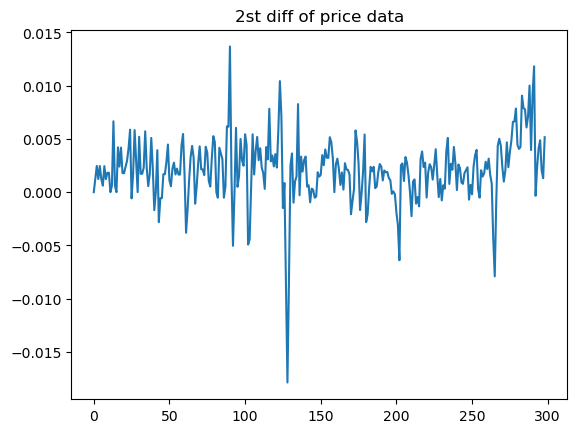

In [56]:
#stationarity test
import statsmodels
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_return, autolag = 'aic') #adf test
if result[1] < 0.05:
    print("The log return time series is stationarity. p-value = %s" %result[1])
else:
    print("The log return time series is non-stationarity. p-value = %s" %result[1])

#white noise test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
p = lb_test(log_return, lags = 1).iloc[0].lb_pvalue
if p < 0.05:
    print("The 2nd difference of price time series is not white noise. p-value = %s" %p)
else:
    print("The 2nd difference of price time series is white noise. p-value = %s" %p)

plt.plot(log_return)
plt.title('2st diff of price data')
plt.show()

We can find that the stationarity of log return data is much better than that of the original price.

In [57]:
#split dataset
df_log_return = pd.DataFrame(log_return)
df_log_return.index = pd.date_range(start = '1998-2', end = '2023', freq = 'M')
log_return_train, log_return_test = df_log_return[: len(df_log_return) - 50], df_log_return[len(df_log_return) - 50:]

In [58]:
#calculate AIC
import statsmodels.api as sm
from statsmodels.tsa.api import ARIMA
log_return_aic_value = []
for ari in range(0, 5):
    for maj in range(0, 5):
        arma_obj = ARIMA(log_return_train, order = (ari, 0, maj)).fit()
        log_return_aic_value.append({'i' : ari,'j' : maj, 'aic_value' : arma_obj.aic})
def sort_by_aic(e):
    return e['aic_value']
log_return_aic_value.sort(key = sort_by_aic)


c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Program_Files_Work\Anaconda3\lib\s

In [59]:
print(*log_return_aic_value, sep = "\n")

{'i': 0, 'j': 3, 'aic_value': -2260.2428563334533}
{'i': 2, 'j': 0, 'aic_value': -2259.659004904384}
{'i': 0, 'j': 4, 'aic_value': -2258.496168519475}
{'i': 2, 'j': 2, 'aic_value': -2258.394805686796}
{'i': 1, 'j': 3, 'aic_value': -2258.2176548250663}
{'i': 3, 'j': 0, 'aic_value': -2258.0601546271614}
{'i': 2, 'j': 1, 'aic_value': -2257.8508709345074}
{'i': 0, 'j': 1, 'aic_value': -2257.813692579727}
{'i': 0, 'j': 2, 'aic_value': -2257.188545211337}
{'i': 1, 'j': 2, 'aic_value': -2256.99482472305}
{'i': 2, 'j': 3, 'aic_value': -2256.92775898552}
{'i': 1, 'j': 1, 'aic_value': -2256.721655365802}
{'i': 1, 'j': 4, 'aic_value': -2256.392026745393}
{'i': 4, 'j': 0, 'aic_value': -2256.3301240186684}
{'i': 3, 'j': 1, 'aic_value': -2255.6708078072597}
{'i': 4, 'j': 1, 'aic_value': -2254.640602413106}
{'i': 2, 'j': 4, 'aic_value': -2254.3495329551397}
{'i': 3, 'j': 4, 'aic_value': -2251.7881764243593}
{'i': 4, 'j': 4, 'aic_value': -2251.4172101970526}
{'i': 4, 'j': 3, 'aic_value': -2251.4044718

As we can see, AIC of log return will have minimize value of $-2260.2428563334533$ when AR order $i = 0$ and MA order $j = 3$, so we develop ARMA(0, 3) for log return of the price.

c:\Program_Files_Work\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


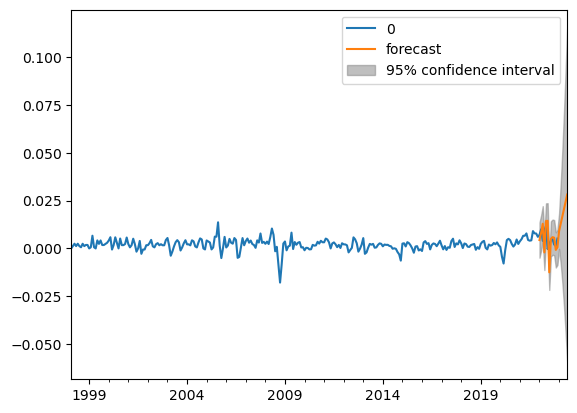

In [60]:
from statsmodels.graphics.tsaplots import plot_predict
log_return_res = ARIMA(df_log_return, order = (0, 2, 4)).fit()
fig, ax = plt.subplots()
ax = df_log_return.loc['1998-2':].plot(ax = ax)
plot_predict(log_return_res, start = '2022', end = '2023-6', ax = ax)
plt.show()

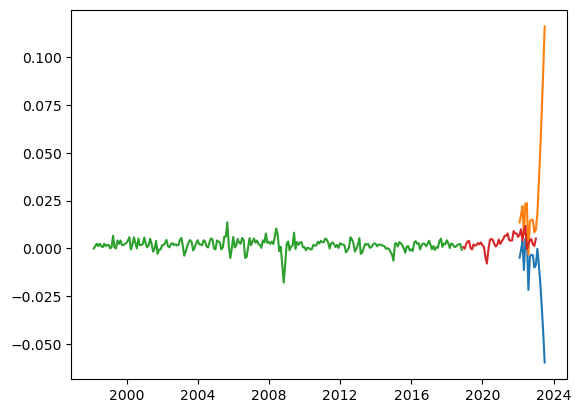

In [61]:
my_log_return_prediction = log_return_res.get_prediction(start = '2022', end = '2023-6').conf_int()
plt.plot(my_log_return_prediction)
plt.plot(log_return_train)
plt.plot(log_return_test)

In [62]:
print(log_return_res.summary())

log_return_coef = log_return_res.params
print('Coefficients: %s' %coef)

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  299
Model:                 ARIMA(0, 2, 4)   Log Likelihood                1170.163
Date:                Mon, 20 Feb 2023   AIC                          -2330.326
Time:                        13:41:15   BIC                          -2311.857
Sample:                    02-28-1998   HQIC                         -2322.932
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -3.236e-05      0.071     -0.000      1.000      -0.139       0.139
ma.L2      -1.279e-05      0.078     -0.000      1.000      -0.152       0.152
ma.L3       1.429e-06      0.080   1.78e-05      1.0

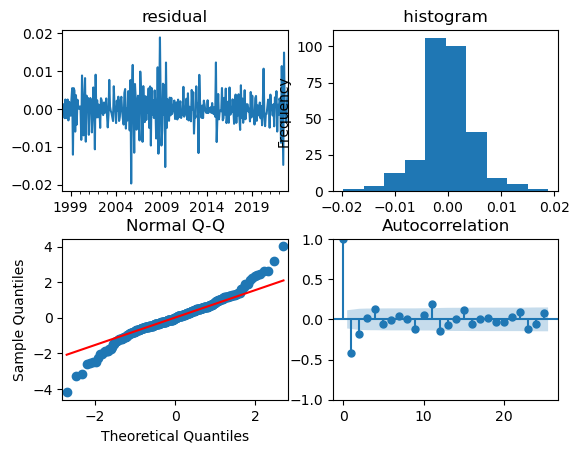

Test MSE: 0.013


In [63]:
log_return_resid = log_return_res.resid
from statsmodels.graphics.api import qqplot

fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.3)

log_return_resid.plot(ax = axs[0][0])
axs[0][0].set_title("residual")

log_return_resid.plot(kind = 'hist', ax = axs[0][1])
axs[0][1].set_title(" histogram " )

sm.qqplot(log_return_resid, line = 'q', fit = True, ax = axs[1][0])
axs[1][0].set_title("Normal Q-Q")

plot_acf(log_return_resid,ax = axs[1][1])
plt.show()

from sklearn.metrics import mean_squared_error
log_return_predictions = log_return_res.forecast(steps = len(log_return_test))
log_return_error = mean_squared_error(log_return_test, log_return_predictions)
print('Test MSE: %.3f' % log_return_error)

So log return test MSE is 0.013.

We have to say, the error of log return estimation is much better than that of the original price in any ways. It is always a good choice to study log return of asset price instead of original prices.

Question:

Gaussianity and Stationarity test [20 Points]

24. Introduce mathematically a Gaussianity test

25. Perform a Gaussianity test of the return time series

26. Introduce mathematically a stationarity test

27. Perform a stationarity test of the return time series

Gaussianity tests are used to find out whether a dataset can be modeled by a gaussian distribution.

The Shapiro-Wilk test is a correlation-based algorithm. The calculation can get a correlation coefficient, and the closer it is to 1, the better the data fits the normal distribution.

\begin{align*}
    W = \frac{\left(\sum_{i=1}^n a_i x_i\right)^2}{\sum_{i=1}^n \left(x_i -  \bar{x}\right)^2}
\end{align*}

In [64]:
from scipy.stats import shapiro
stat, p = shapiro(log_return)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.911, p=0.000
Sample does not look Gaussian (reject H0)


The commonly used stationarity test method is the ADF test, also known as the unit root test.

In order to test whether the logarithmic price $p_t$ of an asset obeys a random walk or a random walk with drift, we use the following two models


\begin{align}
p_t&=\phi_1 p_{t-1}+e_t, \\
p_t&=\phi_0+\phi_1 p_{t-1}+e_t,
\end{align}

where $e_t$ is error. Consider the null hypothesis $H_0: \phi_1=1$ versus the alternative hypothesis $H_a: \phi_1<1$. This is a well-known unit root test problem, developed by Dickey and Fuller. A convenient test statistic is the $t$-ratio of the least squares estimate of $\phi_1$ under the null hypothesis. For (1), we can use OLS to get

\begin{align*}
\hat{\phi}_1&=\frac{\sum_{t=1}^T p_{t-1} p_t}{\sum_{t=1}^T p_{t-1}^2},\\
\hat{\sigma}_e^2&=\frac{\sum_{t=1}^T\left(p_t-\hat{\phi}_1 p_{t-1}\right)^2}{T-1},
\end{align*}

where $p_0=0, T$ is the sample size. $t$-ratio is

\begin{align*}
DF \equiv t \text {-ratio }=\frac{\hat{\phi}_1-1}{ \text {standard deviation of}\hat{\phi}_1}=\frac{\sum_{t=1}^T p_{t-1} e_t}{\hat{\sigma}_e \sqrt{\sum_{t-1}^T p_{t-1}^2}},
\end{align*}

This $t$-ratio is usually called the Dickey-Fuller test. If $\left\{e_t\right\}$ is a white noise sequence, and its moments slightly higher than the second order are limited, then when $T \rightarrow \infty$, DF-statistic tends to a function of standard Brownian motion. If $\phi_0=0$ but we adopt (2) formula, then the $t$-ratio of the obtained test $\phi_1=1$ will be tends to another nonstandard asymptotic distribution.

The full name of the ADF test is the Augmented Dickey-Fuller test. As the name implies, ADF is an augmented form of the Dickey-Fuller test. The DF test can only be applied to the first-order case. When there is a high-order lag correlation in the sequence, the ADF test can be used, so the ADF test is an extension of the DF test.

The ADF test is to judge whether there is a unit root in the sequence: if the sequence is stable, there is no unit root; otherwise, there will be a unit root.

Therefore, the H0 assumption of the ADF test is that there is a unit root. If the obtained significant test statistic is less than three confidence levels (10%, 5%, 1%), then there is (90%, 95, 99%) certainty to reject the null hypothesis.

In [65]:
#stationarity test
import statsmodels
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_return, autolag = 'aic') #adf test
if result[1] < 0.05:
    print("The log return time series is stationarity. p-value = %s" %result[1])
else:
    print("The log return time series is non-stationarity. p-value = %s" %result[1])

The log return time series is stationarity. p-value = 0.0005375473684267725
